**I have data of titanic disaster survival data. Having columns 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'.**
- let's perform regression task on it.

### Importing Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1] Data Exploration

### Load Data

In [2]:
tit_data=pd.read_csv("titanic_train.csv")

In [3]:
len(tit_data)

891

### Viewing Data

In [4]:
tit_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
tit_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
tit_data.index

RangeIndex(start=0, stop=891, step=1)

In [7]:
tit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
tit_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
tit_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 2] Data Analysis

### check for null

In [10]:
tit_data.duplicated().sum()

0

In [11]:
tit_data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
tit_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### let's visualize null values

<AxesSubplot:>

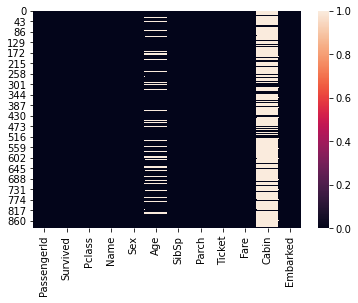

In [13]:
sns.heatmap(tit_data.isna())
#age column have less null value than cabin

### Let's see the percentage of null column

In [14]:
#Age= 177 as per analysis

age_per=177/len(tit_data)*100
print("null % of Age column ", age_per)

null % of Age column  19.865319865319865


In [15]:
#Cabin= 687 as per analysis
cabin_per=687/len(tit_data)*100
print("null % of Cabin column ", cabin_per)

null % of Cabin column  77.10437710437711


In [16]:
#Embarked= 2 as per analysis
emb_per=2/len(tit_data)*100
print("null % of Embarked column ", emb_per)

null % of Embarked column  0.22446689113355783


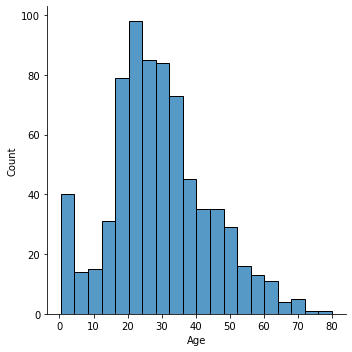

In [17]:
sns.displot(x="Age",data=tit_data)

# 3] Handling missing data

### filling age column using mean method

In [18]:
tit_data["Age"].fillna(tit_data["Age"].mean(),inplace=True)

In [19]:
tit_data["Age"].isna().sum()

0

<AxesSubplot:>

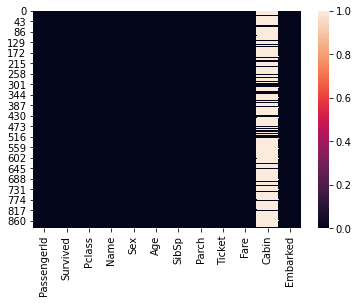

In [20]:
sns.heatmap(tit_data.isna())
#null values are clear

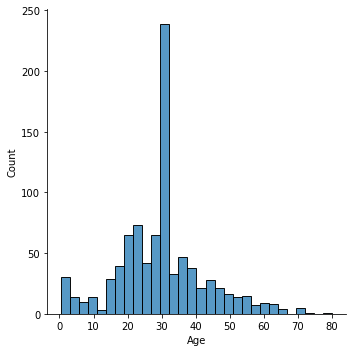

In [21]:
sns.displot(x="Age",data=tit_data)

- I can see cabin column has a lot of number of null values. so we will drop this column

In [22]:
tit_data.drop("Cabin",axis=1,inplace=True) #0=row 1= column 

<AxesSubplot:>

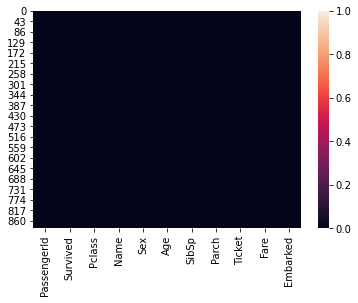

In [23]:
sns.heatmap(tit_data.isna())
#cabin column is not there

In [24]:
tit_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

# 4] Data Visualization

<AxesSubplot:xlabel='Survived', ylabel='count'>

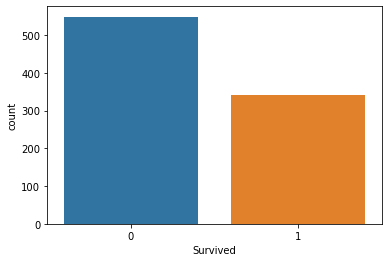

In [25]:
sns.countplot(x="Survived",data=tit_data)
#survived vs not survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

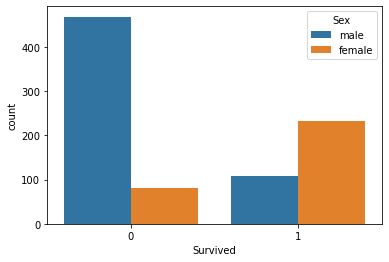

In [26]:
sns.countplot(x="Survived",data=tit_data,hue="Sex")
#male vs female survived not survived

- From above data I can predict that Female passenger survived most than male

- survive 0= No ,1= Yes

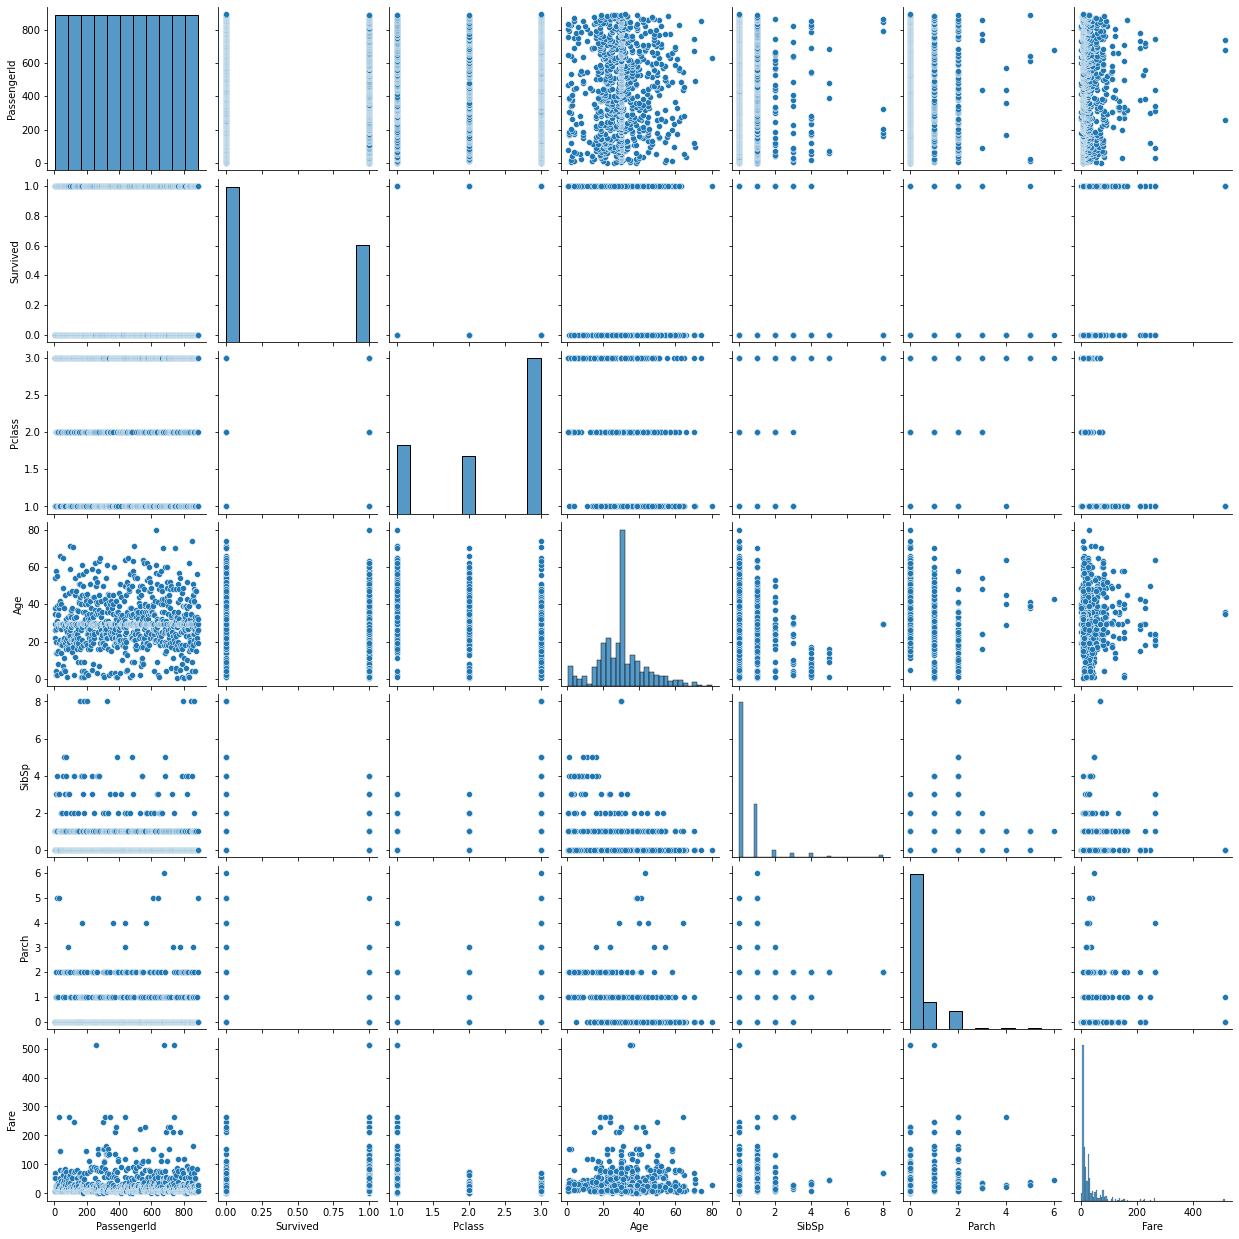

In [27]:
sns.pairplot(data=tit_data)

- from this pairplot I can predict that there is no relationship between any columns

# 5] Preparing Data for model

In [28]:
tit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [29]:
tit_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

- Conversion of string column to numerical column using get_dummies function

In [30]:
gender=pd.get_dummies(tit_data["Sex"],drop_first=True)

In [31]:
gender

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [32]:
tit_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [33]:
tit_data["Gender"]=gender

In [34]:
tit_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,1


- Drop the columns which are not required for modelling

In [35]:
tit_data.drop(["Name","Sex","Ticket","Embarked"],axis=1,inplace=True)

In [36]:
tit_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


### Seprating Dependent & Independant varibale

- y(dependant)
- x(independant)

In [37]:
x=tit_data[["PassengerId","Pclass","Age","SibSp","Parch","Fare","Gender"]]
y=tit_data["Survived"]

In [38]:
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,3,22.000000,1,0,7.2500,1
1,2,1,38.000000,1,0,71.2833,0
2,3,3,26.000000,0,0,7.9250,0
3,4,1,35.000000,1,0,53.1000,0
4,5,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000,1
887,888,1,19.000000,0,0,30.0000,0
888,889,3,29.699118,1,2,23.4500,0
889,890,1,26.000000,0,0,30.0000,1


In [39]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# 6] Data Modelling

### importing train_test_split method

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.33,random_state=42)

### importing logistic regression

In [45]:
from sklearn.linear_model import LogisticRegression

### fit logistic regression

In [46]:
lr=LogisticRegression() #instance

In [47]:
lr.fit(x_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Prediction

In [48]:
predict=lr.predict(x_test)

# 7] Model Evaluation

### confusion matrix

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=["Predicted No","Predicted Yes"],index=["Actual No","Actual Yes"])

,Predicted No,Predicted Yes
Actual No,151,24
Actual Yes,38,82


### classification report

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       175
           1       0.77      0.68      0.73       120

    accuracy                           0.79       295
   macro avg       0.79      0.77      0.78       295
weighted avg       0.79      0.79      0.79       295



**Precision is fine considering Model Selected and Available Data.**

- Precision : Precision is the ratio of correctly predicted positive observations to the total predicted positive observations (0.80)

- Recall : Recall is the ratio of correctly predicted positive observations to the all observations in actual class 

- F1 score - F1 Score is the weighted average of Precision and Recall.